# Estudando distribuições de Normal

O objetivos das próximas aulas é entender os conceitos de distribuição de probabilidades, dentre elas, as mais conhecidas **Binomial**, **Normal** e **de Poisson**.

## Problemas motivadores

1) Em uma prova de 10 questões cada acerto vale 1 ponto. A média de uma turma é 6,7 e o desvio padrão 1,2. Admitindo uma distribuição normal, determine: a) a porcentagem de estudantes que obtiveram 6 pontos; b) o grau máximo dos 10% mais baixos da classe; c) o grau mínimo dos 10% mais altos da classe.

2) Sabendo que a média de peso de recém nascidos é de 3kg com um desvio padrão de 1Kg, Determine a probabilidade de termos bêbes abaixo de 2kg e, assim antecipar e planejar as necessidades de atendimento especial dos recém nascidos (alimentação, maior período de internação etc.). Sabendo que um hospital realiza cerca de 20 partos por dia, quantos leitos precisam ser reservados para atendimento a esses casos? Faça um histograma das probabilidades de nascimentos (X=1, 2, 3, ...).



In [2]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

# 1.
media = 6.7
desvio = 1.2
pontos = 6

"""
PDF(x, media, sigma) - retorna a densidade de probabilidade
CDF(x, media, sigma) - retorna a probabilidade acumulada até o valor x
PPF(q, media, sigma) - Retorna o valor x tal que q% dos valores estão abaixo de x
"""

# A)
prob6 = stats.norm.pdf(pontos + 0.5, media, desvio) - stats.norm.pdf(pontos - 0.5, media, desvio)
porcentagem6 = prob6 * 100
print(porcentagem6)

qntQuestoes = np.arange(0, 11)
for i in range(10):
    i += 1
    VetorPorcentagens = stats.norm.pdf(qntQuestoes + 0.5, media, desvio) - stats.norm.pdf(qntQuestoes - 0.5, media, desvio)
    VetorPorcentagensAcumulada = stats.norm.cdf(qntQuestoes + 0.5, media, desvio) - stats.norm.cdf(qntQuestoes - 0.5, media, desvio)

# B)
os10menores = stats.norm.cdf(0.1, media, desvio)
print(os10menores)

# C)
os10maiores = stats.norm.cdf(0.9, media, desvio)
print(os10maiores)





12.622415965233047
1.8989562465887622e-08
6.713284558090935e-07


15.9 %
3.18 leitos


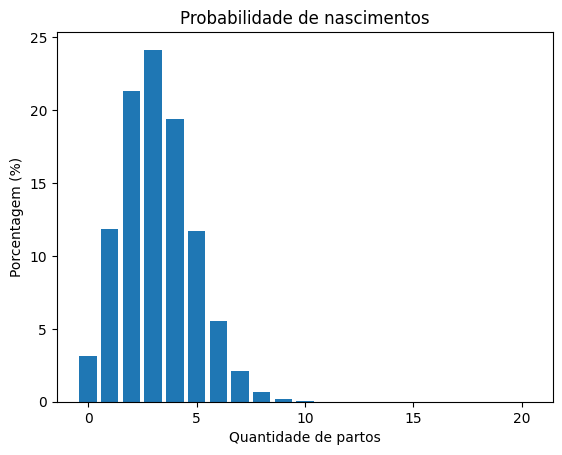

In [4]:
# 2.
media = 3
desvio = 1
partosHospital = 20

PmenorQue2kg = round(stats.norm.cdf(2, media, desvio), 3)
print(PmenorQue2kg*100, "%")

Leitos = partosHospital * PmenorQue2kg
print(Leitos, "leitos")

PdeNascimentos = []
nascimentos = np.arange(0, 21)
PdeNascimentos = stats.binom.pmf(nascimentos, partosHospital, PmenorQue2kg)
PdeNascimentosNormal = stats.norm.pdf(nascimentos, media, desvio)
PdeNascimentosAcumulada = stats.norm.cdf(nascimentos, media, desvio)

plt.bar(nascimentos, PdeNascimentos * 100)
plt.title("Probabilidade de nascimentos")
plt.ylabel("Porcentagem (%)")
plt.xlabel("Quantidade de partos")
plt.show()

Para entendermos melhor a distribuição normal, precisamos antes entender a ideia de distribuições discretas e contínuas de probabilidade. As distribuições de probabilidade são um conceito fundamental em estatística. Para dados univariados, funções de distribuição de probabilidades fornecem um modelo de distribuição dos dados que desempenham um papel fundamental no cálculo de intervalos de confiança, testes de hipóteses, inferências estatísticas, simulações etc.

Relembrem, dos problemas anteriores a ideia de jogar moedas ou mesmo de verificar a quantidade de ovos quebrados em uma cartela. Em ambos os exemplos as probabilidades representavam números muito bem definidos. Matematicamente, temos que para cada ponto do espaço amostral temos uma probabilidade muito bem definida. Nesse caso, dizemos que temos uma **distribuição de probabilidade discreta**. No caso, a soma de todas as probabilidades deve ser igual a 1.

A **Distribuição Binomial** é um exemplo de **distribuição de probabilidade discreta**. 


Já no exemplo das notas, vimos que as notas dos estudantes podem assumir um conjunto contínuo de valores. Com isso, se fossemos construir um histograma de distribuição de notas, teríamos uma curva contínua. Vejam que neste caso teríamos uma dificuldade em somar todas as possíveis probabilidades, dado o caráter de curva contínua, logo, para distribuições contínuas temos a $ \int p(x) dx\ $.

Enquanto no problema da maternidade, embora estejamos trabalhando com um problema com números discretos (afinal não existe 0,16 recém nascidos...) tratamos a variável como contínua. Isso se dá pela característica da distribuição normal e como ela se ajusta bem para problemas onde $N$ é considerado grande (Alguns estudiosos já consideram $N > 20$ uma boa amostragem).  


## A Distribuição Normal

Um dos mais importantes exemplos da distribuição contínua de probabilidade é a **distribuição normal** ou **distribuição de Gauss (ou gaussiana)**, definida pela equação:

$ \begin{align} f_x (X) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{1}{2}(\frac{X-\mu}{\sigma})^2} \end {align} $ 

na qual $\mu$ = média e $\sigma$ = desvio padrão.

A área delimitada pela curva e pelo eixo $ X $ é igual a 1.

Quando a variável $ X $ é expressa em termos de unidade reduzida, isto é,
$ \begin{align} z = \frac{X-\mu}{\sigma} \end {align} $ 

A equação da distribuição normal fica:
$ \begin{align} f_x (z) = \frac{1}{\sqrt{2\pi}} e^{-\frac{1}{2}z^2} \end{align} $

Neste caso, diz-se que $ z $ é **_normalmente distribuído, com média zero e variância 1_**.

O gráfico da curva normal reduzida é apresentado abaixo

<img src=https://images.prismic.io/voitto-blog/ZWY2NDM5ZDAtYzhkZi00OTdmLTkxYzEtZjQyOWYxZmUzMmFj_vtryipffqucmna36obljnyltu_ervdah77n2pednnia9hiwdkkgwf8rnb8gmlyvfvdq5je4uxg8pfic7epo1gtey-aaa41ze5mrehmshzb06kuosxpcbnhtlqtuanwdpunzbqd0y  width="600" height="380" text-align="center">

Observem que no gráfico, estão indicadas as áreas incluídas entre $ -1 \leq z \leq +1 $, $ -2 \leq z \leq +2 $ e $ -3 \leq z \leq +3 $, iguais, respectivamente a 68,26%, 95,44% e 99,74%. 



O gráfico que apresenta a probabilidade de $ P(X = x)$ para cada valor de $x$ é um **_gráfico de densidade de probabilidade_**. É possível ainda, como no exemplo da maternidade, que nos interesse saber a probabilidade acumulada até determinado valor, ou seja, $ P(X \leq x)$, neste caso temos um **_gráfico de densidade acumulada_**.

<img src=http://www.leg.ufpr.br/~paulojus/embrapa/Rembrapa/Rembrapa54x.png>



A primeira parte do problema pede que seja calculada a probabilidade de alunos que tiraram exatamente a nota 6,0. Já os dois tópicos seguintes pede que se calcule a nota dos 10% extremos (mais baixos e mais altos).

Assim, a função norm.ppf retorna o valor da propabilidade de estudantes terem ficado com nota 6,0.

Já a função norm.cdf nos retorna a nota dos estudantes que ficaram entre os 10% mais baixos ou os 10% mais elevados.

# Desafio da aula de hoje

Plote os gráficos da distribuição de probabilidades normal e acumulada dos dois problemas motivadores.

1)


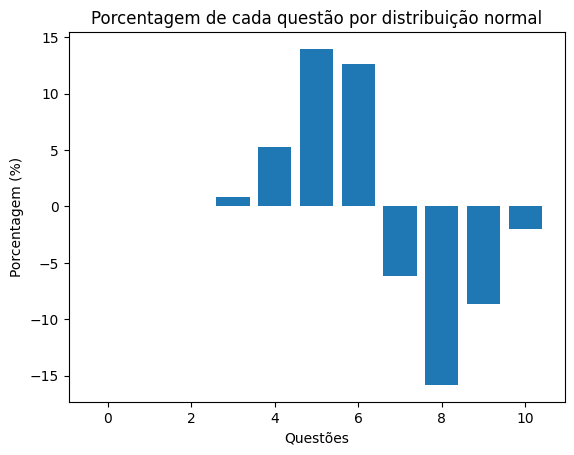

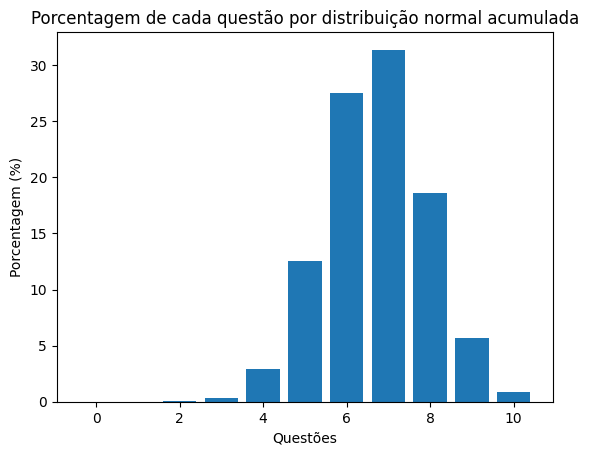

2)


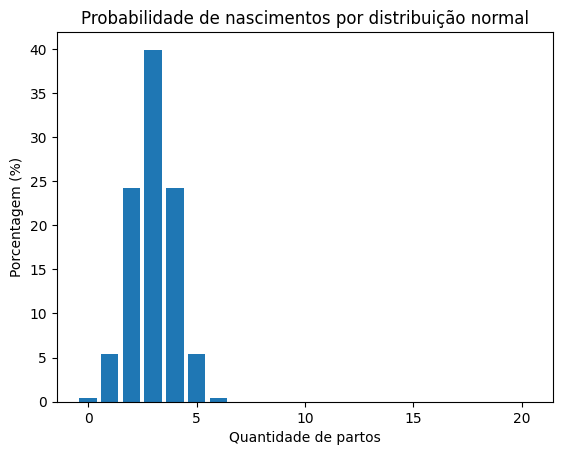

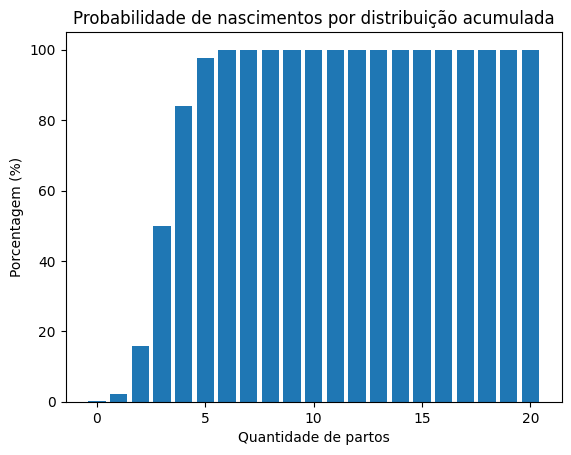

In [5]:
print("1)")
plt.bar(qntQuestoes, VetorPorcentagens * 100)
plt.title("Porcentagem de cada questão por distribuição normal")
plt.ylabel("Porcentagem (%)")
plt.xlabel("Questões")
plt.show()

plt.bar(qntQuestoes, VetorPorcentagensAcumulada * 100)
plt.title("Porcentagem de cada questão por distribuição normal acumulada")
plt.ylabel("Porcentagem (%)")
plt.xlabel("Questões")
plt.show()

print("2)")
plt.bar(nascimentos, PdeNascimentosNormal * 100)
plt.title("Probabilidade de nascimentos por distribuição normal")
plt.ylabel("Porcentagem (%)")
plt.xlabel("Quantidade de partos")
plt.show()

plt.bar(nascimentos, PdeNascimentosAcumulada * 100)
plt.title("Probabilidade de nascimentos por distribuição acumulada")
plt.ylabel("Porcentagem (%)")
plt.xlabel("Quantidade de partos")
plt.show()